📌 Primeiras linhas do dataframe:
   Unnamed: 0                                                        Título  Nota  N_Avaliações  Desconto            Marca         Material               Gênero        Temporada                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       Review1                                                                                                                                                                                                                                                                                                        

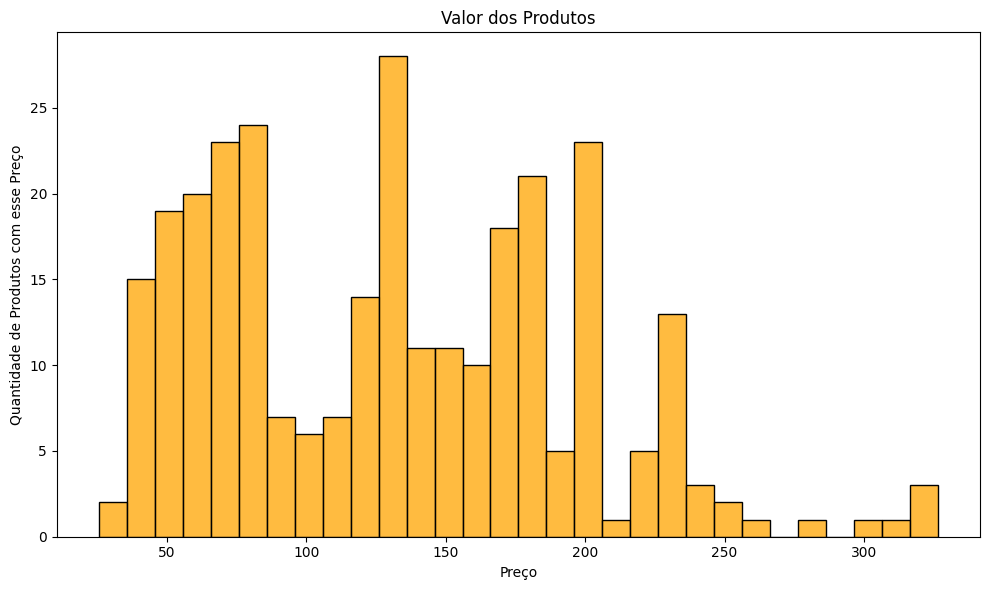

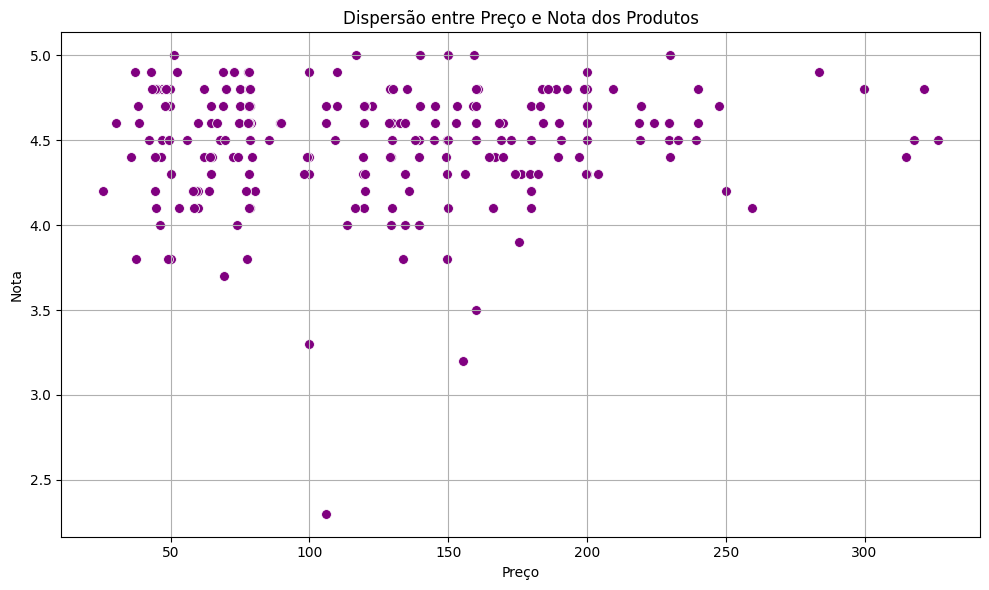

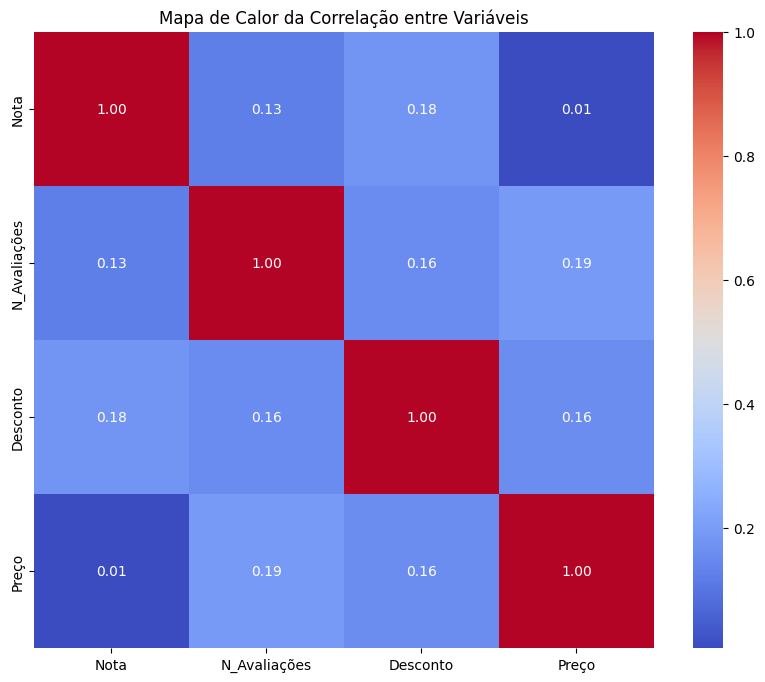

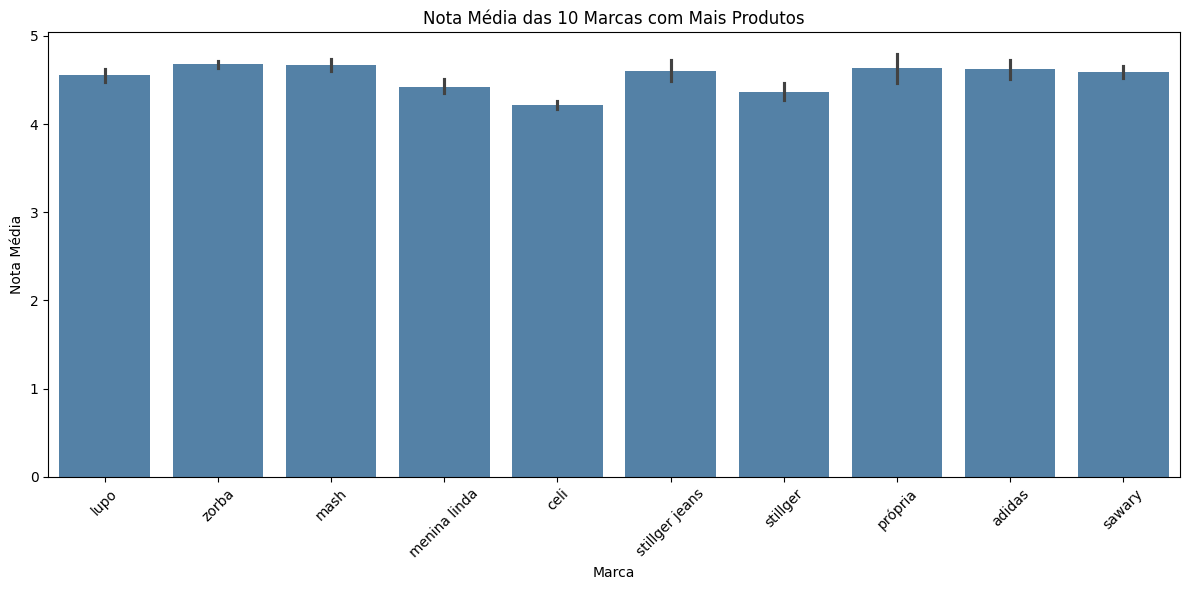

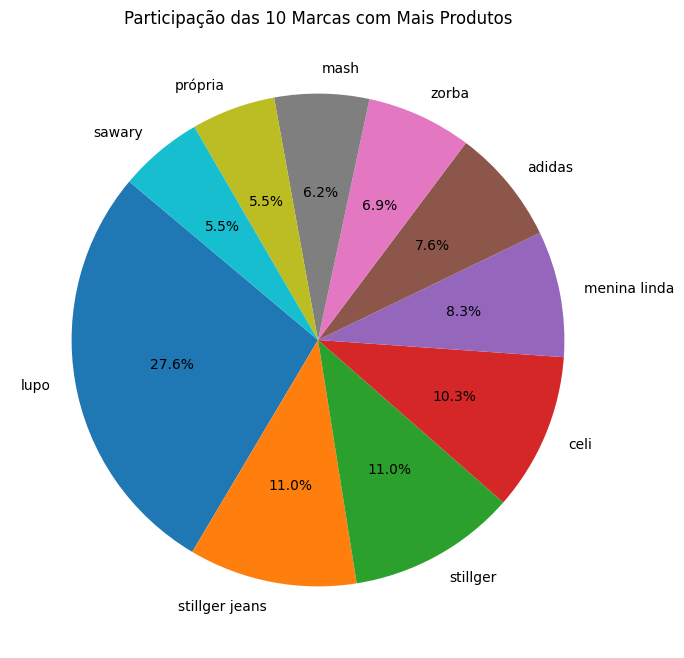

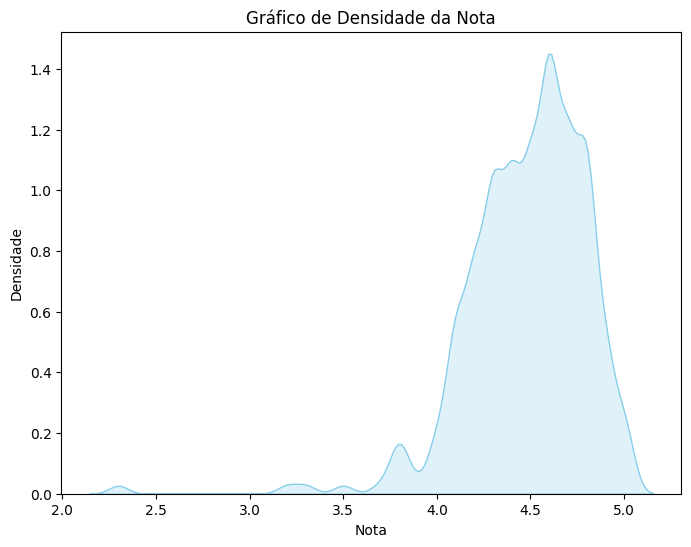

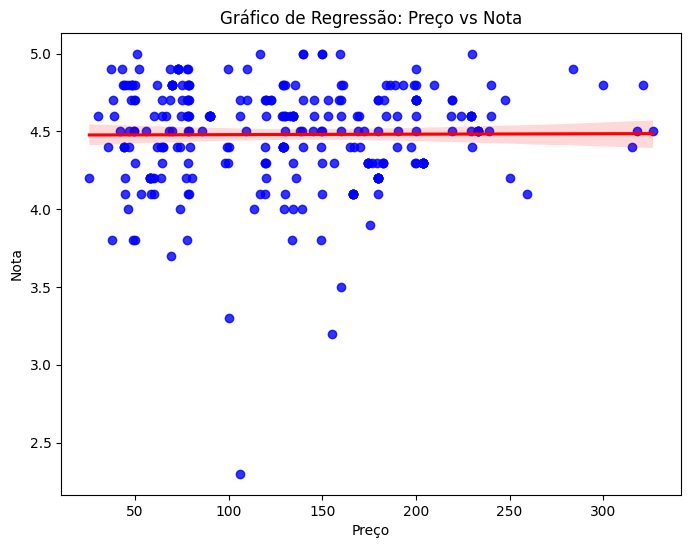

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv('ecommerce_estatistica.csv')

# Ver as 5 primeiras linhas
print("📌 Primeiras linhas do dataframe:")
print(df.head().to_string())

# Ver número de linhas e colunas
print("\n📊 Dimensões do dataframe:")
print(df.shape)

# Ver nomes das colunas
print("\n🧾 Nome das colunas:")
print(df.columns.tolist())

# Ver tipos de dados e valores ausentes
print("\n🔍 Informações das colunas:")
print(df.info())

# Ver resumo estatístico de colunas numéricas
print("\n📈 Estatísticas descritivas (colunas numéricas):")
print(df.describe().to_string())

# Ver estatísticas de colunas categóricas
print("\n🔤 Frequência das colunas categóricas (top 3):")
for col in df.select_dtypes(include='object').columns:
    print(f'\n{col}:\n{df[col].value_counts().head(3)}')

# Ver quantas colunas têm valores nulos
print("\n⚠️ Valores ausentes por coluna:")
print(df.isnull().sum())

# Gráfico Histograma
plt.figure(figsize=(10, 6))
sns.histplot(df['Preço'].dropna(), bins=30, color='orange')
plt.title('Valor dos Produtos')
plt.xlabel('Preço')
plt.ylabel('Quantidade de Produtos com esse Preço')
plt.tight_layout()
plt.show()

# Gráfico Dispersão
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Preço'], y=df['Nota'], color='purple', s=50)
plt.title('Dispersão entre Preço e Nota dos Produtos')
plt.xlabel('Preço')
plt.ylabel('Nota')
plt.grid(True)
plt.tight_layout()
plt.show()

# Gráfico Heatmap
df_corr = df[['Nota', 'N_Avaliações', 'Desconto', 'Preço']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Mapa de Calor da Correlação entre Variáveis')
plt.show()

# Gráfico de barra
top_marcas = df['Marca'].value_counts().nlargest(10).index
df_top = df[df['Marca'].isin(top_marcas)]
plt.figure(figsize=(12, 6))
sns.barplot(x='Marca', y='Nota', data=df_top, color='steelblue')
plt.title('Nota Média das 10 Marcas com Mais Produtos')
plt.xlabel('Marca')
plt.ylabel('Nota Média')
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()
plt.show()

# Gráfico de pizza
contagem_marcas = df_top['Marca'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(contagem_marcas, labels=contagem_marcas.index, autopct='%1.1f%%', startangle=140)
plt.title('Participação das 10 Marcas com Mais Produtos')
plt.show()

# Gráfico de densidade
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='Nota', fill=True, color='skyblue', bw_adjust=0.5)
plt.title('Gráfico de Densidade da Nota')
plt.xlabel('Nota')
plt.ylabel('Densidade')
plt.show()

# Gráfico de Regressão
plt.figure(figsize=(8, 6))
sns.regplot(x='Preço', y='Nota', data=df, scatter_kws={'color':'blue'}, line_kws={'color':'red'})
plt.title('Gráfico de Regressão: Preço vs Nota')
plt.xlabel('Preço')
plt.ylabel('Nota')
plt.show()